# BepiColombo PWI EFD Swp: L1a QL -- 2025/7/26

In [40]:
import copy
import datetime
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from spacepy import pycdf

In [41]:
sys.path.append('./lib/')
import Bepi_PWI_EFD_swp_data as bepi_data
import Bepi_PWI_EFD_swp_lib  as bepi_swp
# import Bepi_PWI_EFD_cal_lib  as bepi_cal

# parameter set -- to be modified

In [42]:
# *** Dump ***
dump_mode = 0                           # 0: no-dump  1:plot dump

# *** CAL ***
unit_mode = 2                           # [Power]     0: RAW    1: V    2: V/m
band_mode = 0                           # [Power]     0: sum    1: /Hz

# *** Unit ***
time_mode = 1                           # [Time]      0: Epoch   1: data number
gap_mode  = 0                           # [gap]       0: n/a     1: gap

# *** Power range set ***
p_raw_max = +10                         # background: 7.5   CAL: 10
p_raw_min = -10                         # background: 2.5   CAL: 5

# *** Directory set: set by User ***
work_dir = '/Users/user/0-python/Bepi_python/ql/'   # Plot dump folder

# get CDF data

In [43]:
mode_cdf = 0        # 0:flight  1:test
mode_ant = 1        # 1:U(WPT)  2:V(MEF)

# TEST
# date = '2025060?'
# date = '20250605'     # Initial Check DryRun #1
# date = '20250606'     # Initial Check DryRun #1
# date = '20250625'     # Initial Check DryRun #2

# Flight -- only 'l'
# date='20250410'       # WPT only
# date='20240409'       # WPT only
# date='20231106'       # WPT only
date='20231026'       # WPT only
# date='20230522'       # WPT only
# date='20221107'       # WPT only
# date='20220517'       # WPT only
# date='20220311'       # WPT only
# date='20211124'       # WPT only
# date='20210617'       # WPT only
# date='20201217'       # WPT only
# date='20200304'       # WPT only
# date='20191210'       # WPT only
# date='2019080?'       # WPT only  WPT latch release
# date='20190807'       # WPT only  WPT latch release
# date='20190805'       # WPT only  WPT latch release
# date='20190802'       # WPT only  WPT latch release
# date='20190630'

data_dir, data_list = bepi_data.datalist(date, mode_cdf, mode_ant)  # [date]   yyyymmdd: group read    others: file list

/Users/user/D-Univ/data/data-Mio/cdf/EFD/L1/2023/bc_mmo_pwi-efd_l1_swp-wpt_20231026*.cdf
/Users/user/D-Univ/data/data-Mio/cdf/EFD/L1/2023/
['bc_mmo_pwi-efd_l1_swp-wpt_20231026_r01-v00-00.cdf']


In [44]:
class struct:
    pass
data = struct()
num_list = len(data_list)
for i in range(num_list):
    data_name = data_list[i];   cdf_file = data_dir + data_name
    cdf = pycdf.CDF(cdf_file);  data1 = bepi_swp.efd_swp_read(cdf, mode_ant)
    if i==0: data = data1;                               
    else:    data = bepi_swp.efd_swp_add(data, data1, mode_ant)
    if mode_ant==1:
        print(i, data.Vu1.shape, cdf_file, mode_ant)
    else:
        print(i, data.Vv1.shape, cdf_file, mode_ant)
data_name = os.path.split(data_name)[1];            print("data name:", data_name)

0 (8, 512) /Users/user/D-Univ/data/data-Mio/cdf/EFD/L1/2023/bc_mmo_pwi-efd_l1_swp-wpt_20231026_r01-v00-00.cdf 1
data name: bc_mmo_pwi-efd_l1_swp-wpt_20231026_r01-v00-00.cdf


In [45]:
data = bepi_swp.efd_swp_shaping(data, mode_ant)

In [46]:
if mode_ant==1:
    print("    data.Vu1(,dt)[V]:", data.Vu1.shape,             data.Vu1[0][0],                data.Vu1[-1][-1])
    print("    data.Vu2(,dt)[V]:", data.Vu2.shape,             data.Vu2[0][0],                data.Vu2[-1][-1])
    print("  data.WPT_Sweep_Tbl:", data.WPT_Sweep_Tbl.shape,   "\t", data.WPT_Sweep_Tbl[0],   data.WPT_Sweep_Tbl[-1])
else:
    print("    data.Vv1(,dt)[V]:", data.Vv1.shape,             data.Vv1[0][0],                data.Vv1[-1][-1])
    print("    data.Vv2(,dt)[V]:", data.Vv2.shape,             data.Vv2[0][0],                data.Vv2[-1][-1])
print(" data.EFD_saturation:", data.EFD_saturation.shape,  "\t", data.EFD_saturation[0],  data.EFD_saturation[-1])      # **** needed ??? ****
print("   data.EFD_spinrate:", data.EFD_spinrate.shape,    "\t", data.EFD_spinrate[0],    data.EFD_spinrate[-1])        # **** needed ??? ****
print("data.SunPulseCounter:", data.SunPulseCounter.shape, "\t", data.SunPulseCounter[0], data.SunPulseCounter[-1])
print("          data.epoch:", data.epoch.shape,           "\t", data.epoch[0],           data.epoch[-1])
print("         data.EFD_TI:", data.EFD_TI.shape,          "\t", '{:X}'.format(data.EFD_TI[0]), '{:X}'.format(data.EFD_TI[-1]))

    data.Vu1(,dt)[V]: (8, 512) 0.066287875 nan
    data.Vu2(,dt)[V]: (8, 512) nan 0.07260101
  data.WPT_Sweep_Tbl: (8,) 	 0 0
 data.EFD_saturation: (8,) 	 0 0
   data.EFD_spinrate: (8,) 	 0.0 0.0
data.SunPulseCounter: (8,) 	 515 514
          data.epoch: (8,) 	 2023-10-26 12:54:22.531616 2023-10-26 13:05:32.906494
         data.EFD_TI: (8,) 	 1958F8 1E95BE


In [47]:
date1 = data.epoch[0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
date2 = data.epoch[-1]; date2 = date2.strftime('%Y/%m/%d %R:%S')
str_date = date1 + "  -  " + date2
n_time0 = data.n_time

if data.n_time>1: 
    print("    Epoch:", str_date, "(interval:", data.epoch[1] - data.epoch[0], data.epoch[-1] - data.epoch[-2], ")")
else:
    print("    Epoch:", str_date)
print("  Samples:", n_time0)

    Epoch: 2023/10/26 12:54:22  -  2023/10/26 13:05:32 (interval: 0:01:31.031250 0:01:31.031250 )
  Samples: 8


In [48]:
swp = copy.deepcopy(data)

### Time resolution up

In [49]:
from datetime import timedelta
Epoch_1d = swp.epoch.tolist();   Epoch_swp = []
if (data.n_dt > 1):
    for i in range(data.n_dt):
        Epoch_swp += Epoch_1d
    for i in range(n_time0):
        for j in range(data.n_dt):
            Epoch_swp[i*data.n_dt + j] = Epoch_1d[i] + timedelta(seconds = j/data.n_dt)
else:
    Epoch_swp += Epoch_1d
n_time1 = n_time0 * data.n_dt; num_1d = np.arange(n_time1)

In [50]:
# sweep = bepi_cal.pot_cal(pot)     # CAL
swp.cf       = 0.0
swp.str_unit = "V"

### Peak

In [51]:
bepi_swp.swp_peak(swp, n_time0, mode_ant)

[ All   Peak] <Vu1> +8.21e-02 -7.26e-02 <Vu2> +8.21e-02 -1.01e-01
[     0 peak] <Vu1> +6.94e-02 -7.26e-02 <Vu2> +nan +nan
[     4 peak] <Vu1> +8.21e-02 +4.73e-02 <Vu2> +nan +nan
[     7 peak] <Vu1> +nan +nan <Vu2> +8.21e-02 +4.42e-02


In [52]:
p_max0 = p_raw_max + swp.cf/10;  p_min0 = p_raw_min + swp.cf/10
if mode_ant==1:
    p_max0  = np.ceil( np.nanmax( [np.nanmax(swp.Vu1), np.nanmax(swp.Vu2)] )*5)/5 + 1
    p_min0  = np.ceil( np.nanmin( [np.nanmax(swp.Vu1), np.nanmax(swp.Vu2)] )*5)/5 - 1
else:
    p_max0  = np.ceil( np.nanmax( [np.nanmax(swp.Vv1), np.nanmax(swp.Vv2)] )*5)/5 + 1
    p_min0  = np.ceil( np.nanmin( [np.nanmax(swp.Vv1), np.nanmax(swp.Vv2)] )*5)/5 - 1
print("conversion factor:", '{:.1f}'.format(swp.cf), "    MAX-min:", '{:.1f}'.format(p_max0), '{:.1f}'.format(p_min0), "   str_unit:", swp.str_unit)

conversion factor: 0.0     MAX-min: 1.2 -0.8    str_unit: V


In [53]:
str_Vu1 = 'Vu1 (SWP)';   str_Vu2 = 'Vu2 (SWP)';   str_Vv1 = 'Vv1 (SWP)';   str_Vv2 = 'Vv2 (SWP)'

# RAW

[-0.5, 4095.5]
[-0.5, 7.5]


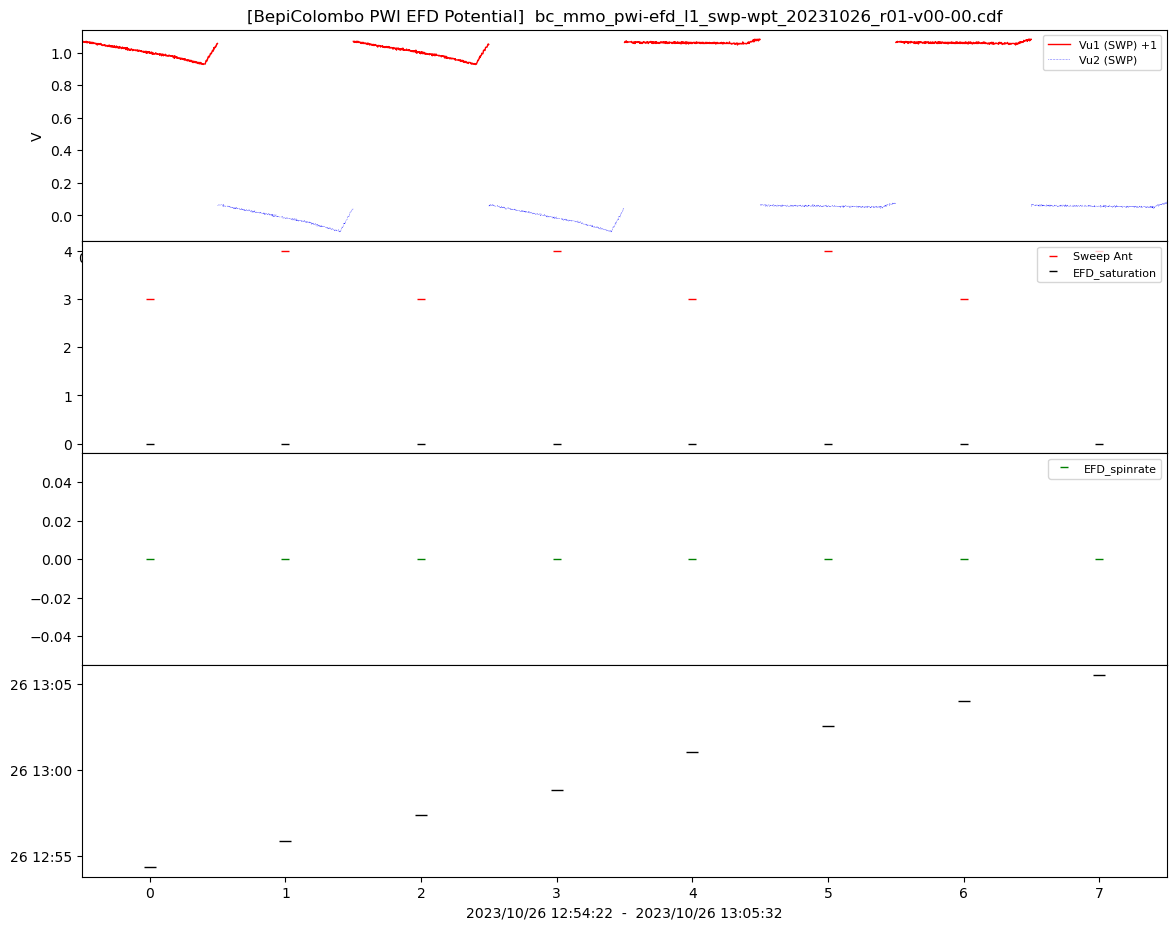

In [54]:
n0 = 0;             n1    = n_time0
# n0 = n_time0//10;   n1    = n_time0//6
p_max  = p_max0+2;  p_min = p_min0

fig = plt.figure(figsize=(14, 11))
ax1 = fig.add_subplot(4, 1, 1);  ax2 = fig.add_subplot(4, 1, 2);  ax3 = fig.add_subplot(4, 1, 3);  ax4 = fig.add_subplot(4, 1, 4)
if mode_ant==1:
    ax1.plot(np.ravel(swp.Vu1[n0:n1])+1,        '-r', linewidth=1.0, label=str_Vu1 + ' +1')
    ax1.plot(np.ravel(swp.Vu2[n0:n1]),          ':b', linewidth=0.4, label=str_Vu2 )
else:
    ax1.plot(np.ravel(swp.Vv1[n0:n1])+1,        '-r', linewidth=1.0, label=str_Vv1 + ' +1')
    ax1.plot(np.ravel(swp.Vv2[n0:n1]),          ':b', linewidth=0.4, label=str_Vv2 )
#
ax2.plot(np.ravel(data.sweep_ant[n0:n1])+2,     '_r', linewidth=3.0, label='Sweep Ant')
ax2.plot(np.ravel(data.EFD_saturation[n0:n1]),  '_k', linewidth=3.0, label='EFD_saturation')    # ???
#
ax3.plot(np.ravel(data.EFD_spinrate[n0:n1]),    '_g', linewidth=1.0, label='EFD_spinrate')
#
ax4.plot(np.ravel(data.epoch[n0:n1]),           '_k', markersize=8)

ax1.set_ylabel(swp.str_unit);  ax4.set_xlabel(str_date)
#
title_label = '[BepiColombo PWI EFD Potential]  ' + data_name;  ax1.set_title(title_label)
ax1.legend(loc='upper right', fontsize=8);  ax2.legend(loc='upper right', fontsize=8);  ax3.legend(loc='upper right', fontsize=8)

if mode_ant==1: xlim=[-.5, len(np.ravel(data.Vu1[n0:n1])) -.5]
else:           xlim=[-.5, len(np.ravel(data.Vv1[n0:n1])) -.5]
print(xlim); ax1.set_xlim(xlim)
xlim=[-.5, len(np.ravel(data.epoch[n0:n1]))-.5];   print(xlim); ax2.set_xlim(xlim); ax3.set_xlim(xlim); ax4.set_xlim(xlim)
# ylim=[10**p_min, 10**p_max];                    ax1.set_ylim(ylim)

fig.subplots_adjust(hspace=0);  fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_raw.png'
    fig.savefig(png_fname)

# SWEEP

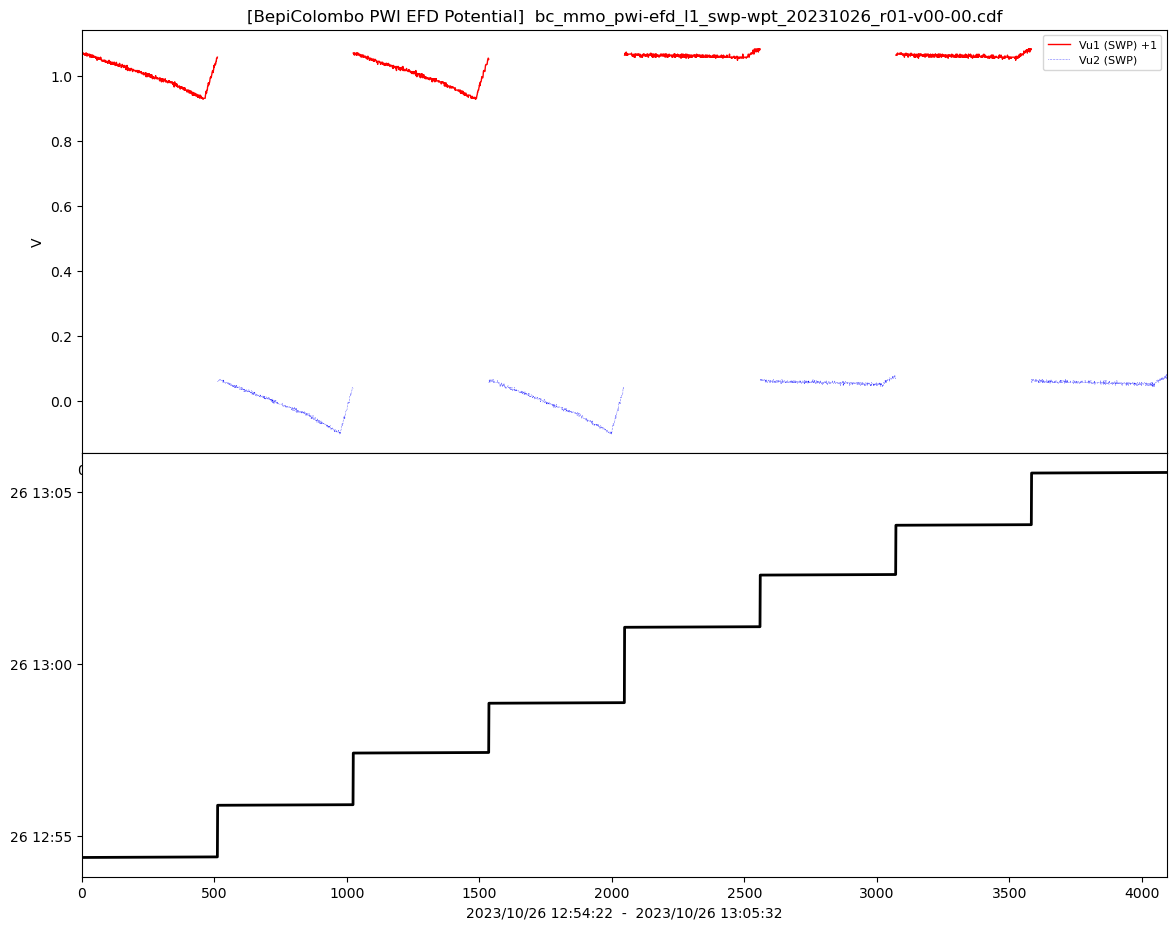

In [55]:
n0     = 0;                 n1     = n_time0
n0e    = n0 * data.n_dt;    n1e    = n1 * data.n_dt
p_max  = p_max0+2;          p_min  = p_min0

fig = plt.figure(figsize=(14, 11))
if time_mode == 1:
    ax1 = fig.add_subplot(2, 1, 1); ax2 = fig.add_subplot(2, 1, 2)
    if mode_ant==1: 
        ax1.plot(num_1d[n0e:n1e], np.ravel(swp.Vu1[n0:n1])+1,   '-r', linewidth=1.0, label=str_Vu1 + ' +1')
        ax1.plot(num_1d[n0e:n1e], np.ravel(swp.Vu2[n0:n1]),     ':b', linewidth=0.4, label=str_Vu2)
    else:
        ax1.plot(num_1d[n0e:n1e], np.ravel(swp.Vv1[n0:n1])+1,   '-r', linewidth=1.0, label=str_Vv1 + ' +1')
        ax1.plot(num_1d[n0e:n1e], np.ravel(swp.Vv2[n0:n1]),     ':b', linewidth=0.4, label=str_Vv2)
    ax2.plot(num_1d[n0e:n1e], Epoch_swp[n0e:n1e],   '-k', linewidth=2.0, label='Epoch')
    ax2.set_xlabel(str_date)
else:
    ax1 = fig.add_subplot(1, 1, 1)
    if mode_ant==1: 
        ax1.plot(Epoch_swp[n0e:n1e], np.ravel(swp.Vu1[n0:n1])+1, '-r', linewidth=0.4, label=str_Vu1 + ' +1')
        ax1.plot(Epoch_swp[n0e:n1e], np.ravel(swp.Vu2[n0:n1]),   ':r', linewidth=0.4, label=str_Vu2 )
    else:
        ax1.plot(Epoch_swp[n0e:n1e], np.ravel(swp.Vv1[n0:n1])+1, '-b', linewidth=0.4, label=str_Vv1 + ' +1')
        ax1.plot(Epoch_swp[n0e:n1e], np.ravel(swp.Vv2[n0:n1]),   ':b', linewidth=0.4, label=str_Vv2)
    ax1.set_xlabel(str_date)
ax1.set_ylabel(swp.str_unit)
#
title_label = '[BepiColombo PWI EFD Potential]  ' + data_name;  ax1.set_title(title_label)
ax1.legend(loc='upper right', fontsize=8)

if time_mode == 1:
    xlim=[num_1d[n0e], num_1d[n1e-1]]
    ax1.set_xlim(xlim); ax2.set_xlim(xlim)
else:
    xlim=[Epoch_swp[n0e], Epoch_swp[n1e-1]]
    #E_min = '2024-08-21 04:00:00';  t_min = datetime.datetime.strptime(E_min, "%Y-%m-%d %H:%M:%S");  
    #E_max = '2024-08-21 19:00:00';  t_max = datetime.datetime.strptime(E_max, "%Y-%m-%d %H:%M:%S");  xlim=[t_min, t_max]
    ax1.set_xlim(xlim)
# ylim=[p_min, p_max];  ax1.set_ylim(ylim)

fig.subplots_adjust(hspace=0);  fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_swp.png'
    fig.savefig(png_fname)

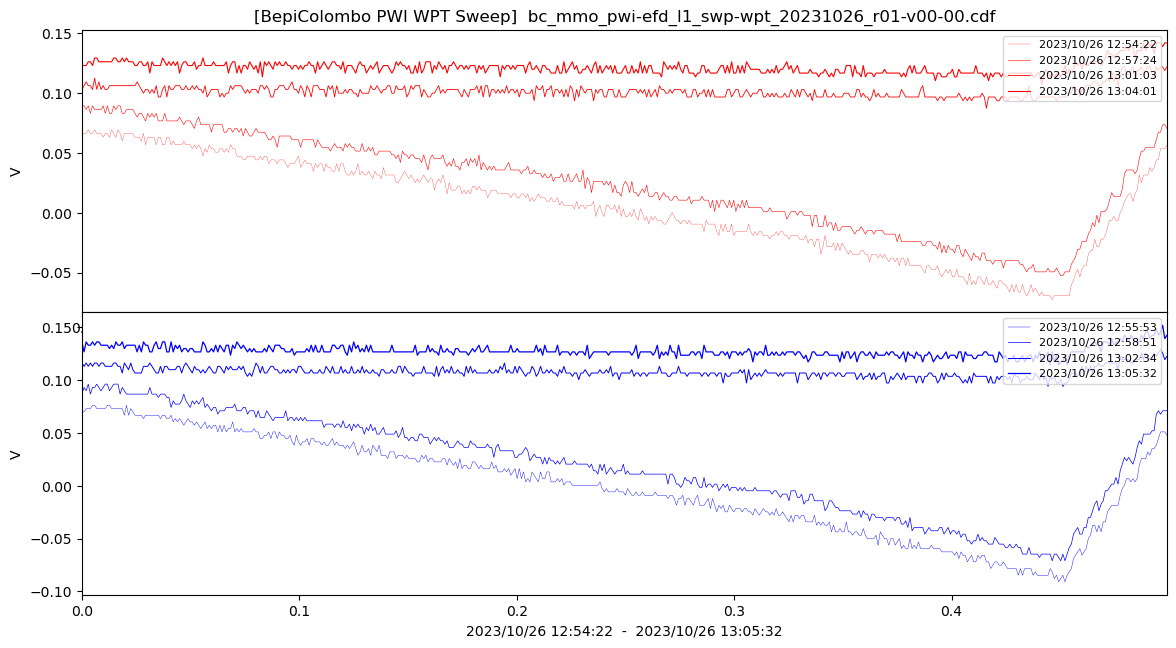

In [57]:
n0    = 0;          n1     = n_time0
p_max = p_max0;     p_min  = p_min0

fig = plt.figure(figsize=(14, 11))
ax1 = fig.add_subplot(3, 1, 1); ax2 = fig.add_subplot(3, 1, 2)
if mode_ant==1:
    for i in range(n0, n1):
        date1 = data.epoch[i];  date1 = date1.strftime('%Y/%m/%d %R:%S')
        if swp.Vu1[i][0] > -100:
            ax1.plot(data.t_offset, swp.Vu1[i]+0.01*i, '-r', linewidth=0.1*i+0.2, label=date1)
        if swp.Vu2[i][0] > -100:
            ax2.plot(data.t_offset, swp.Vu2[i]+0.01*i, '-b', linewidth=0.1*i+0.2, label=date1)
    title_label = '[BepiColombo PWI WPT Sweep]  ' + data_name;  
else:
    for i in range(n0, n1):
        date1 = data.epoch[i];  date1 = date1.strftime('%Y/%m/%d %R:%S')
        if swp.Vv1[i][0] > -100:
            ax1.plot(data.t_offset, swp.Vv1[i]+0.01*i, '-r', linewidth=0.1*i+0.2, label=date1)
        if swp.Vv2[i][0] > -100:
            ax2.plot(data.t_offset, swp.Vv2[i]+0.01*i, '-b', linewidth=0.1*i+0.2, label=date1)
    title_label = '[BepiColombo PWI MEF Sweep]  ' + data_name;  
ax1.set_ylabel(swp.str_unit);  ax2.set_ylabel(swp.str_unit);  ax2.set_xlabel(str_date);  ax1.set_title(title_label)
ax1.legend(loc='upper right', fontsize=8);  ax2.legend(loc='upper right', fontsize=8)

xlim=[data.t_offset[0], data.t_offset[-1]]; ax1.set_xlim(xlim); ax2.set_xlim(xlim)
# ylim=[p_min, p_max];  ax1.set_ylim(ylim)

fig.subplots_adjust(hspace=0);  fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_swp2.png'
    fig.savefig(png_fname)